#Nike Profit Prediction

Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor

#Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Nike_sales_uncleaned.xlsx"
df = pd.read_excel(path)

In [4]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09 00:00:00,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09 00:00:00,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,2024-04-10 00:00:00,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024-09-12 00:00:00,Retail,Delhi,187.89


In [5]:
df.shape

(2500, 13)

In [6]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [8]:
df.isna()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,True,False,False,False
3,False,False,False,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,True,True,False,False,False,False,False
2496,False,False,False,False,False,False,True,True,False,True,False,False,False
2497,False,False,False,False,False,True,False,False,False,False,False,False,False
2498,False,False,False,False,True,False,False,True,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
Order_ID,0
Gender_Category,0
Product_Line,0
Product_Name,0
Size,510
Units_Sold,1235
MRP,1254
Discount_Applied,1668
Revenue,0
Order_Date,616


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Size'] = df['Size'].astype(str).str.upper().str.strip()
df['Size'] = df['Size'].replace('nan',np.nan)

In [12]:
df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')
df.loc[df['Units_Sold'] < 0, 'Units_Sold'] = np.nan
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09 00:00:00,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09 00:00:00,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,2024-04-10 00:00:00,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024-09-12 00:00:00,Retail,Delhi,187.89


#Cleaning the Data

###Dropping the rows containing the null values.

In [13]:
# Fill numerical columns with median (robust against outliers)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [14]:
df.shape

(2500, 13)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              2500 non-null   object 
 5   Units_Sold        2500 non-null   float64
 6   MRP               2500 non-null   float64
 7   Discount_Applied  2500 non-null   float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [16]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,2.0,6110.03,0.470,0.0,2024-03-09 00:00:00,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.615,0.0,2024-07-09 00:00:00,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,6110.03,0.615,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,2.0,9673.57,0.615,0.0,2024-04-10 00:00:00,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,2.0,6110.03,0.615,0.0,2024-09-12 00:00:00,Retail,Delhi,187.89


In [17]:
df['Recalculated_Revenue'] = df['MRP'] * (1 - df['Discount_Applied']) * df['Units_Sold']
df['Revenue'] = np.where(
    (df['Revenue'] - df['Recalculated_Revenue']).abs() > 1,
    df['Recalculated_Revenue'],
    df['Revenue'])

In [18]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,2000,Kids,Training,SuperRep Go,M,2.0,6110.03,0.470,6476.63180,2024-03-09 00:00:00,Online,bengaluru,-770.45,6476.63180
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.615,5726.40915,2024-07-09 00:00:00,Retail,Hyd,-112.53,5726.40915
2,2002,Women,Soccer,Premier III,M,4.0,6110.03,0.615,9409.44620,NaN,Retail,Mumbai,3337.34,9409.44620
3,2003,Kids,Lifestyle,Blazer Mid,L,2.0,9673.57,0.615,7448.64890,2024-04-10 00:00:00,Online,Pune,3376.85,7448.64890
4,2004,Kids,Running,React Infinity,XL,2.0,6110.03,0.615,4704.72310,2024-09-12 00:00:00,Retail,Delhi,187.89,4704.72310


In [19]:
df=df.drop('Order_ID', axis=1)
df.head()

,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,M,2.0,6110.03,0.470,6476.63180,2024-03-09 00:00:00,Online,bengaluru,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.615,5726.40915,2024-07-09 00:00:00,Retail,Hyd,-112.53,5726.40915
2,Women,Soccer,Premier III,M,4.0,6110.03,0.615,9409.44620,NaN,Retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,L,2.0,9673.57,0.615,7448.64890,2024-04-10 00:00:00,Online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,XL,2.0,6110.03,0.615,4704.72310,2024-09-12 00:00:00,Retail,Delhi,187.89,4704.72310


In [20]:
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df.head()

,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,M,2.0,6110.03,0.470,6476.63180,2024-03-09 00:00:00,Online,bengaluru,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.615,5726.40915,2024-07-09 00:00:00,Retail,Hyd,-112.53,5726.40915
2,Women,Soccer,Premier III,M,4.0,6110.03,0.615,9409.44620,NaN,Retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,L,2.0,9673.57,0.615,7448.64890,2024-04-10 00:00:00,Online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,XL,2.0,6110.03,0.615,4704.72310,2024-09-12 00:00:00,Retail,Delhi,187.89,4704.72310


In [21]:
df['Region']

,Region
0,bengaluru
1,Hyd
2,Mumbai
3,Pune
4,Delhi
...,...
2495,Pune
2496,Hyd
2497,Bangalore
2498,Mumbai


In [22]:
df['Region'].unique()

array(['bengaluru', 'Hyd', 'Mumbai', 'Pune', 'Delhi', 'Bangalore',
       'Hyderabad', 'hyderbad', 'Kolkata'], dtype=object)

In [23]:
df['Region']=df['Region'].replace('Hyd','Hyderabad')
df['Region']=df['Region'].replace('hyderbad','Hyderabad')
df['Region']=df['Region'].replace('bengaluru','Bangalore')

In [24]:
df['Region'].value_counts()

,count
Region,
Delhi,438
Bangalore,436
Mumbai,418
Kolkata,417
Hyderabad,403
Pune,388


In [25]:
df= df.drop('Size', axis=1)
df.head(3)

,Gender_Category,Product_Line,Product_Name,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,2.0,6110.03,0.470,6476.63180,2024-03-09 00:00:00,Online,Bangalore,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,3.0,4957.93,0.615,5726.40915,2024-07-09 00:00:00,Retail,Hyderabad,-112.53,5726.40915
2,Women,Soccer,Premier III,4.0,6110.03,0.615,9409.44620,NaN,Retail,Mumbai,3337.34,9409.44620


In [26]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],errors='coerce')
#for converting the dates to a standard format

In [27]:
df.head()

,Gender_Category,Product_Line,Product_Name,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,2.0,6110.03,0.470,6476.63180,2024-03-09,Online,Bangalore,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,3.0,4957.93,0.615,5726.40915,2024-07-09,Retail,Hyderabad,-112.53,5726.40915
2,Women,Soccer,Premier III,4.0,6110.03,0.615,9409.44620,NaT,Retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,2.0,9673.57,0.615,7448.64890,2024-04-10,Online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,2.0,6110.03,0.615,4704.72310,2024-09-12,Retail,Delhi,187.89,4704.72310


In [28]:
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df.loc[(df['MRP'].isna()) | (df['MRP'] <= 0), 'MRP'] = np.nan
df.head()  #for converting the column to numeric, replacing the non positive values(if any) to Nan(not a number)

,Gender_Category,Product_Line,Product_Name,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,2.0,6110.03,0.470,6476.63180,2024-03-09,Online,Bangalore,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,3.0,4957.93,0.615,5726.40915,2024-07-09,Retail,Hyderabad,-112.53,5726.40915
2,Women,Soccer,Premier III,4.0,6110.03,0.615,9409.44620,NaT,Retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,2.0,9673.57,0.615,7448.64890,2024-04-10,Online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,2.0,6110.03,0.615,4704.72310,2024-09-12,Retail,Delhi,187.89,4704.72310


In [29]:
#converting the values to strings
#changing the values to lowercase and removing tabs(spaces)
df['Sales_Channel'] = df['Sales_Channel'].astype(str).str.lower().str.strip()
df.head()

,Gender_Category,Product_Line,Product_Name,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,2.0,6110.03,0.470,6476.63180,2024-03-09,online,Bangalore,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,3.0,4957.93,0.615,5726.40915,2024-07-09,retail,Hyderabad,-112.53,5726.40915
2,Women,Soccer,Premier III,4.0,6110.03,0.615,9409.44620,NaT,retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,2.0,9673.57,0.615,7448.64890,2024-04-10,online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,2.0,6110.03,0.615,4704.72310,2024-09-12,retail,Delhi,187.89,4704.72310


In [30]:
df.head()

,Gender_Category,Product_Line,Product_Name,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit,Recalculated_Revenue
0,Kids,Training,SuperRep Go,2.0,6110.03,0.470,6476.63180,2024-03-09,online,Bangalore,-770.45,6476.63180
1,Women,Soccer,Tiempo Legend,3.0,4957.93,0.615,5726.40915,2024-07-09,retail,Hyderabad,-112.53,5726.40915
2,Women,Soccer,Premier III,4.0,6110.03,0.615,9409.44620,NaT,retail,Mumbai,3337.34,9409.44620
3,Kids,Lifestyle,Blazer Mid,2.0,9673.57,0.615,7448.64890,2024-04-10,online,Pune,3376.85,7448.64890
4,Kids,Running,React Infinity,2.0,6110.03,0.615,4704.72310,2024-09-12,retail,Delhi,187.89,4704.72310


#Preprocessing the data

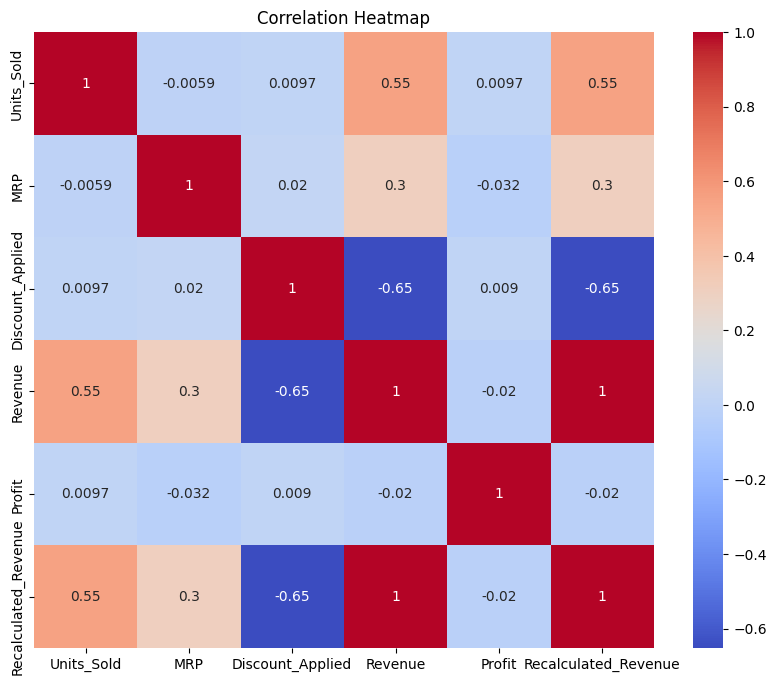

In [31]:
numeric_df =df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

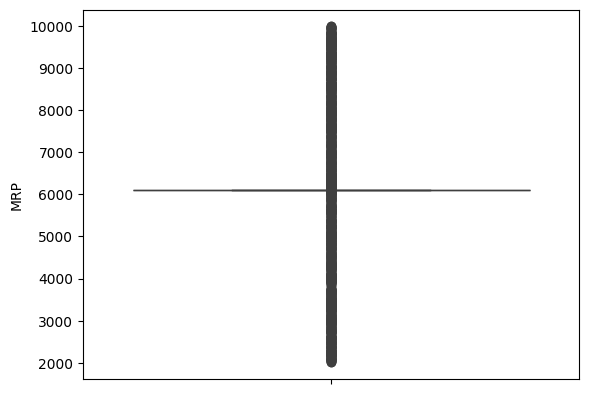

<Figure size 500x1000 with 0 Axes>

In [32]:
sns.boxplot(df['MRP'])
plt.figure(figsize = (5,10))
plt.show()

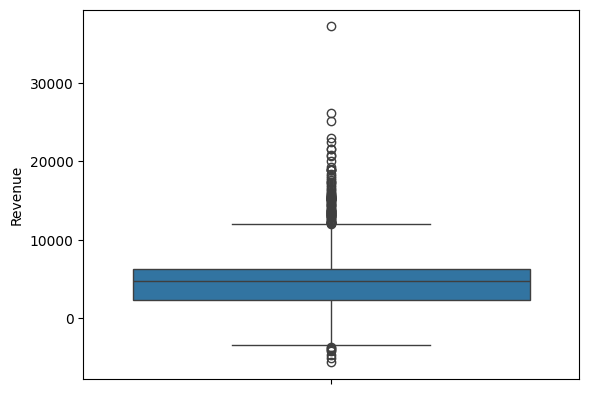

<Figure size 1000x700 with 0 Axes>

In [33]:
sns.boxplot(data=df['Revenue'])  #plotting boxplot for revenue
plt.figure(figsize = (10,7))
plt.show()

In [34]:
Q1 = df["Revenue"].quantile(0.25) #handling outliers
Q3 = df["Revenue"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df["Revenue"] = np.clip(df["Revenue"],lower,upper)

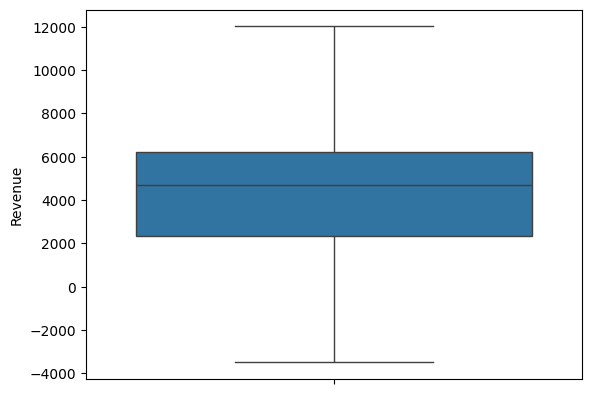

<Figure size 1000x700 with 0 Axes>

In [35]:
sns.boxplot(data=df['Revenue'])
plt.figure(figsize = (10,7))
plt.show()

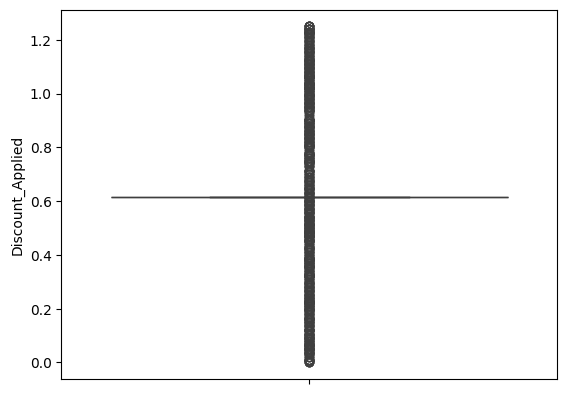

<Figure size 1000x700 with 0 Axes>

In [36]:
sns.boxplot(data=df['Discount_Applied'])
plt.figure(figsize = (10,7))
plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Convert all categorical columns to string type to ensure uniformity
for col in categorical_columns:
    df[col] = df[col].astype(str)

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,
                  columns=encoder.get_feature_names_out(categorical_columns))

# Ensure proper index alignment before concatenating
df_reset = df.reset_index(drop=True)
one_hot_df_reset = one_hot_df.reset_index(drop=True)

df_encoded = pd.concat([df_reset, one_hot_df_reset], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded data : \n{df_encoded}")

Encoded data : 
      Units_Sold      MRP  Discount_Applied     Revenue Order_Date   Profit  \
0            2.0  6110.03             0.470  6476.63180 2024-03-09  -770.45   
1            3.0  4957.93             0.615  5726.40915 2024-07-09  -112.53   
2            4.0  6110.03             0.615  9409.44620        NaT  3337.34   
3            2.0  9673.57             0.615  7448.64890 2024-04-10  3376.85   
4            2.0  6110.03             0.615  4704.72310 2024-09-12   187.89   
...          ...      ...               ...         ...        ...      ...   
2495         3.0  6110.03             0.615  7057.08465 2025-05-14     2.97   
2496         2.0  6110.03             0.615  4704.72310        NaT  -487.36   
2497         2.0  6647.60             0.520  6381.69600 2025-02-07  -918.14   
2498         4.0  5358.70             0.615  8252.39800 2024-11-12  3352.29   
2499         2.0  5550.99             0.615  4274.26230 2024-11-23  2453.57   

      Recalculated_Revenue  Gender_

#Exploratory Data Analysis

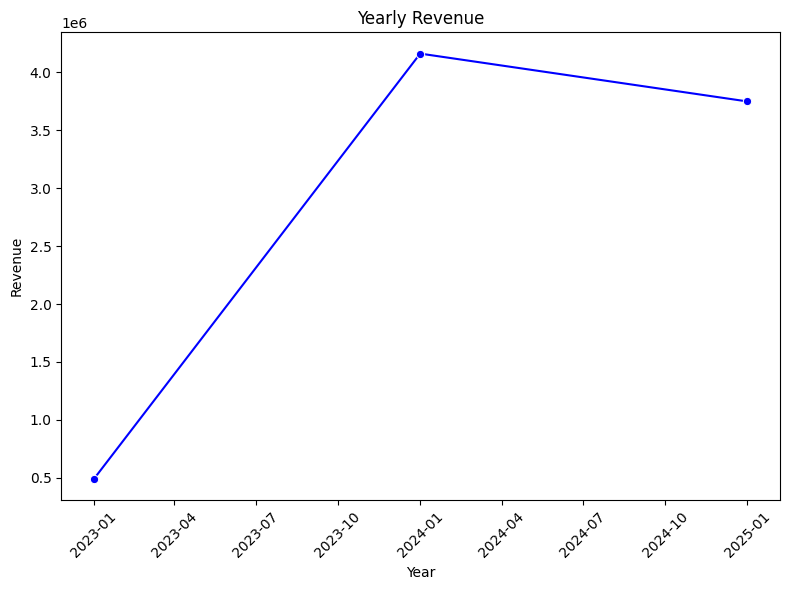

In [38]:
df_time = df_encoded.groupby(df['Order_Date'].dt.to_period('Y'))['Revenue'].sum().reset_index()
df_time['Order_Date'] = df_time['Order_Date'].dt.to_timestamp()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_time, x='Order_Date', y='Revenue', marker='o', color='blue')
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-602561408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rev.values, y=region_rev.index, palette='Oranges_d')


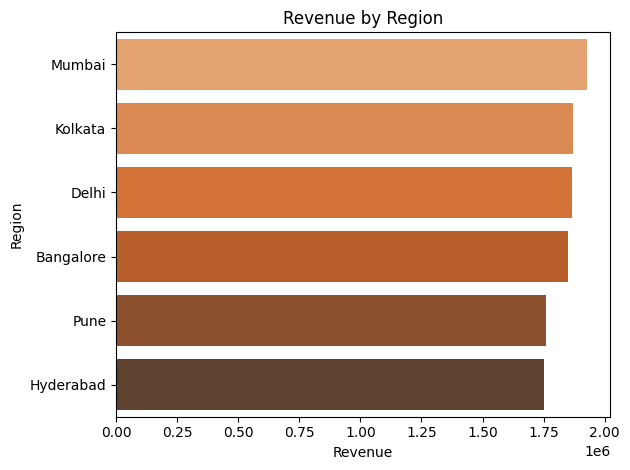

In [39]:
plt.figure()
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=region_rev.values, y=region_rev.index, palette='Oranges_d')
plt.title('Revenue by Region')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

/tmp/ipython-input-804741964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_rev.values, y=region_rev.index, palette='Purples_d')


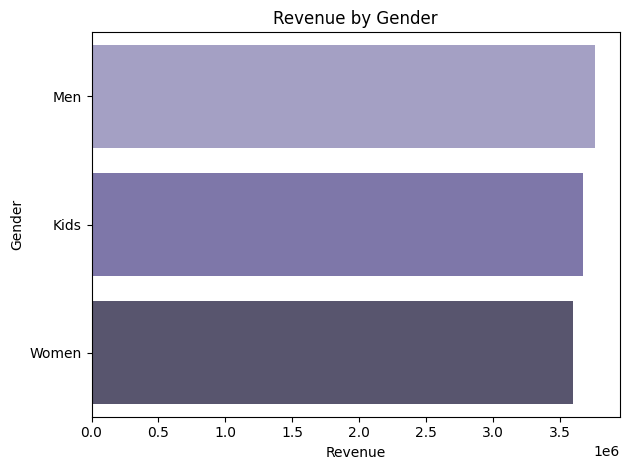

In [40]:
plt.figure()
region_rev = df.groupby('Gender_Category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=region_rev.values, y=region_rev.index, palette='Purples_d')
plt.title('Revenue by Gender')
plt.xlabel('Revenue')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4048474865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sales_Channel', palette='pastel')
/tmp/ipython-input-4048474865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sales_Channel', palette='pastel')


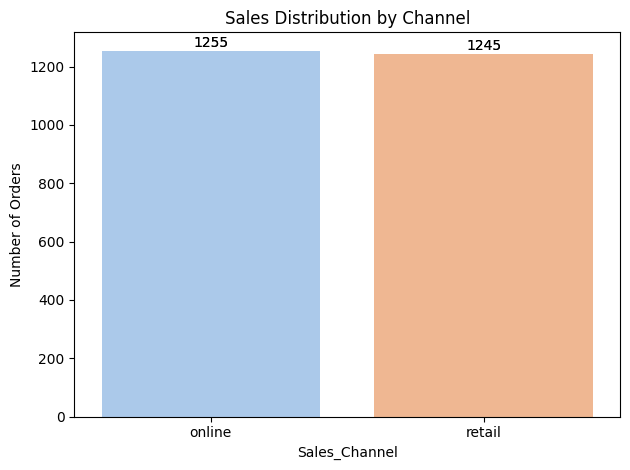

In [41]:
plt.figure()
sns.countplot(data=df, x='Sales_Channel', palette='pastel')
plt.title('Sales Distribution by Channel')
plt.ylabel('Number of Orders')

ax = sns.countplot(data=df, x='Sales_Channel', palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    ax.text(x_pos, y_pos + 2, count, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

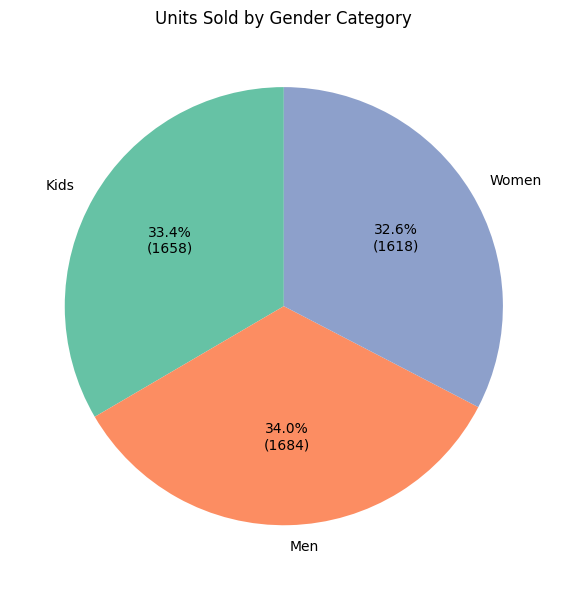

In [42]:
gender_sales = df.groupby('Gender_Category')['Units_Sold'].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_sales,
    labels=gender_sales.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * gender_sales.sum() / 100)})',
    colors=plt.get_cmap('Set2').colors,
    startangle=90)
plt.title('Units Sold by Gender Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1960305587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='mako')


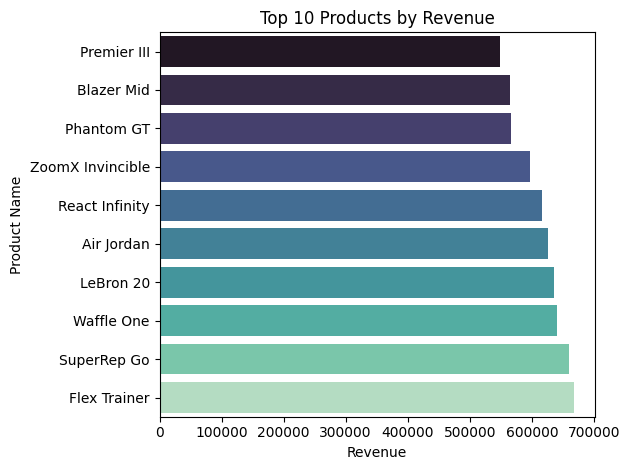

In [43]:
top_products = df.groupby('Product_Name')['Revenue'].sum().nlargest(10).sort_values()
plt.figure()
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

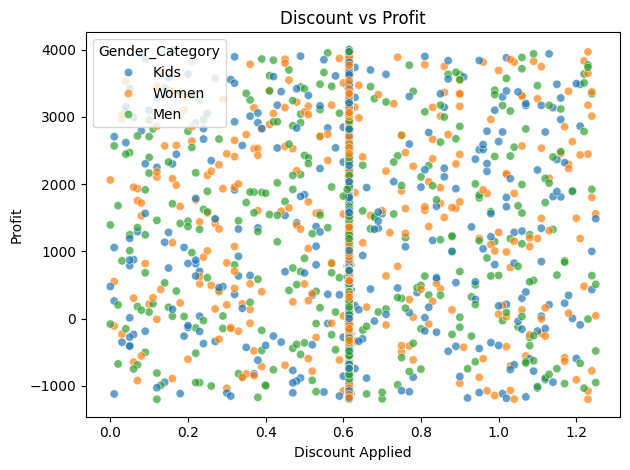

In [44]:
plt.figure()
sns.scatterplot(data=df, x='Discount_Applied', y='Profit', hue='Gender_Category', alpha=0.7)
plt.title('Discount vs Profit')
plt.xlabel('Discount Applied')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3355112096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_product_line.index, y=revenue_by_product_line.values, palette="magma")


Text(0, 0.5, 'Total Revenue')

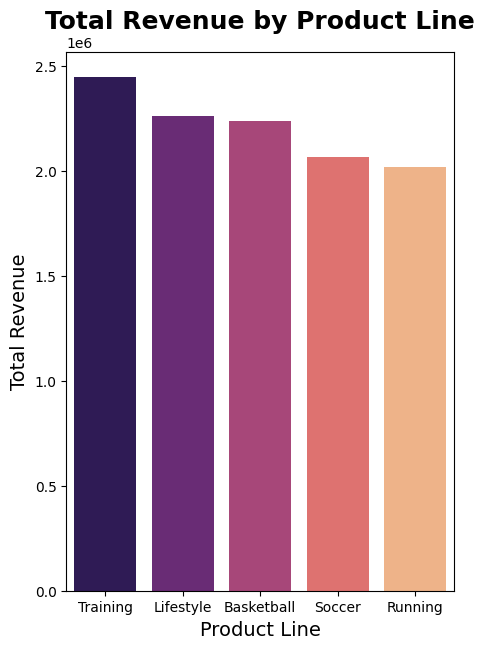

In [45]:
revenue_by_product_line = df.groupby("Product_Line")["Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(5, 7))
sns.barplot(x=revenue_by_product_line.index, y=revenue_by_product_line.values, palette="magma")
plt.title("Total Revenue by Product Line", fontsize=18, fontweight="bold")
plt.xlabel("Product Line", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)

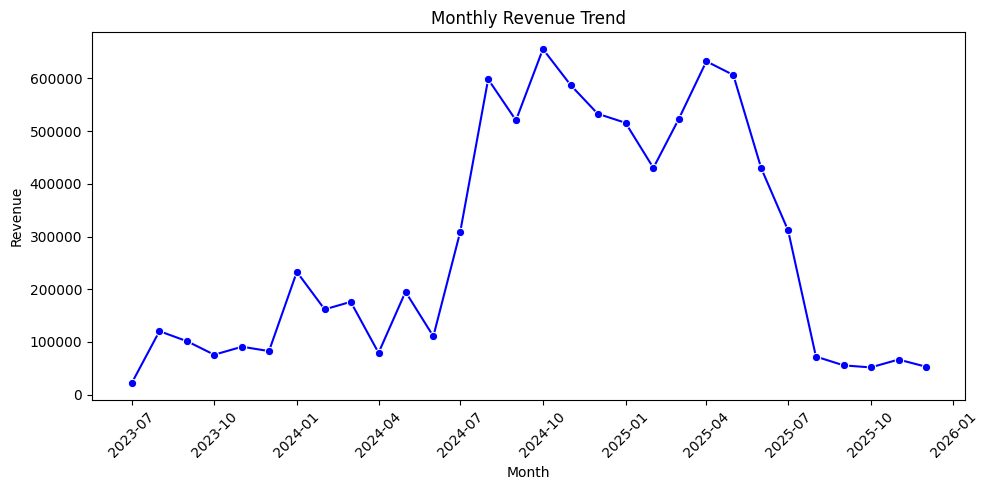

In [46]:
df_time = df.groupby(df['Order_Date'].dt.to_period('M'))['Revenue'].sum().reset_index()
df_time['Order_Date'] = df_time['Order_Date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_time, x='Order_Date', y='Revenue', marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

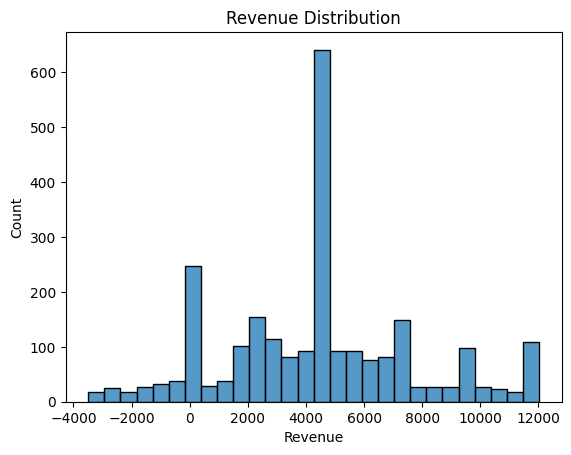

In [47]:
sns.histplot(df_encoded["Revenue"]) #univariate analysis
plt.title("Revenue Distribution")
plt.show()

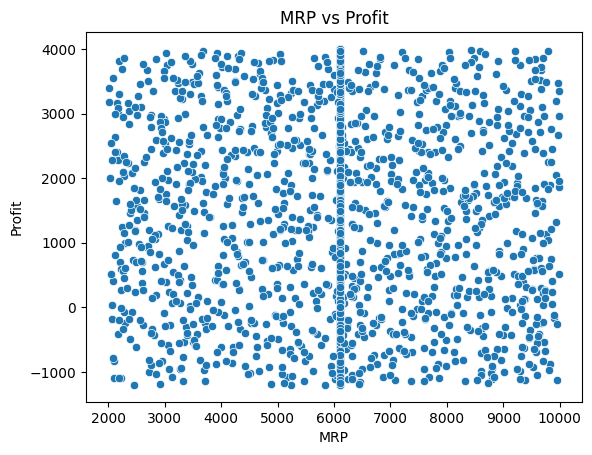

In [48]:
sns.scatterplot(x='MRP', y='Profit', data=df_encoded)
plt.title("MRP vs Profit")
plt.show()

Model Development


In [49]:
df_encoded.columns

Index(['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Profit', 'Recalculated_Revenue', 'Gender_Category_Kids',
       'Gender_Category_Men', 'Gender_Category_Women',
       'Product_Line_Basketball', 'Product_Line_Lifestyle',
       'Product_Line_Running', 'Product_Line_Soccer', 'Product_Line_Training',
       'Product_Name_Air Force 1', 'Product_Name_Air Jordan',
       'Product_Name_Air Zoom', 'Product_Name_Blazer Mid',
       'Product_Name_Dunk Low', 'Product_Name_Flex Trainer',
       'Product_Name_Free RN', 'Product_Name_Kyrie Flytrap',
       'Product_Name_LeBron 20', 'Product_Name_Mercurial Superfly',
       'Product_Name_Metcon 7', 'Product_Name_Pegasus Turbo',
       'Product_Name_Phantom GT', 'Product_Name_Premier III',
       'Product_Name_React Infinity', 'Product_Name_SuperRep Go',
       'Product_Name_Tiempo Legend', 'Product_Name_Waffle One',
       'Product_Name_Zoom Freak', 'Product_Name_ZoomX Invincible',
       'Sales_Channel_online', 'Sale

In [50]:
df_encoded.shape

(2500, 43)

In [51]:
df_encoded['Profit_Margin'] = df_encoded['Profit'] / (df_encoded['Revenue'] + 1)

In [52]:
X = df_encoded.drop(['Profit','Order_Date'], axis=1)
y = df_encoded['Profit']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [55]:
hgbr=HistGradientBoostingRegressor()
hgbr.fit(X_train, y_train)
hgbr_pred=hgbr.predict(X_test)

Model Evaluation


In [56]:
def evaluate_model(model_name,y_true,y_pred):
  r2=r2_score(y_true,y_pred)
  mae=mean_absolute_error(y_true,y_pred)
  mse=mean_squared_error(y_true,y_pred)
  return{
      "Model":model_name,
      "R2 Score":r2,
      "Mean Absolute Error":mae,
      "Mean Squared Error":mse}
results=pd.DataFrame([evaluate_model("DecisionTree",y_test,dt_pred),
                        evaluate_model("RandomForest",y_test,rf_pred),
              evaluate_model("HistGradientBoostingRegressor",y_test,hgbr_pred)])
results

,Model,R2 Score,Mean Absolute Error,Mean Squared Error
0,DecisionTree,0.965687,163.115477,72614.672314
1,RandomForest,0.984934,79.509998,31882.694322
2,HistGradientBoostingRegressor,0.982702,89.600946,36606.069851


In [57]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Units_Sold                       2500 non-null   float64       
 1   MRP                              2500 non-null   float64       
 2   Discount_Applied                 2500 non-null   float64       
 3   Revenue                          2500 non-null   float64       
 4   Order_Date                       1884 non-null   datetime64[ns]
 5   Profit                           2500 non-null   float64       
 6   Recalculated_Revenue             2500 non-null   float64       
 7   Gender_Category_Kids             2500 non-null   float64       
 8   Gender_Category_Men              2500 non-null   float64       
 9   Gender_Category_Women            2500 non-null   float64       
 10  Product_Line_Basketball          2500 non-null   float64    